# Jimmy Wrangler Project


Import the libraries


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

Defining variables section:

In [45]:
Ave_temp_vector=[]
Solar_sum_vector=[]
Wind_sum_vector=[]
Ave_wind_speed_vector=[]
other_renewable_sum_vector=[]
total_load_sum_vector=[]
total_load_sum_year=0
Solar_sum_year=0
Wind_sum_year=0
other_renewable_sum_year=0

 - load 2 datasets from github repository. One is for generation power from various sources in Spain from 2015 to 2018 and the other is weather condition for different cities in Spain from 2015 to 2018. 

In [46]:
Spain_generation = pd.read_csv('https://raw.githubusercontent.com/aminshojaei/Introduction-to-Data-Science-Fall2019/master/energy_dataset.csv', low_memory = False)
Spain_weather = pd.read_csv('https://raw.githubusercontent.com/aminshojaei/Jimmy-Wrangler-Data-Explorer/master/weather_features.csv', low_memory = False)


- Select time and solar and wind generation from generation dataset
- Select time, city , temp and wind speed from weather dataset

In [47]:

S_generation = Spain_generation [['time' ,'generation solar', 'generation wind onshore','generation other renewable','total load actual']]
S_weather = Spain_weather [['dt_iso','city_name' ,'temp', 'wind_speed']]


In [48]:
S_generation.head()  # Top 5 row of the S_generation dataset

,time,generation solar,generation wind onshore,generation other renewable,total load actual
0,2015-01-01 00:00:00+01:00,49.0,6378.0,73.0,25385.0
1,2015-01-01 01:00:00+01:00,50.0,5890.0,71.0,24382.0
2,2015-01-01 02:00:00+01:00,50.0,5461.0,73.0,22734.0
3,2015-01-01 03:00:00+01:00,50.0,5238.0,75.0,21286.0
4,2015-01-01 04:00:00+01:00,42.0,4935.0,74.0,20264.0


In [49]:
S_weather.head(10)   # top 10 row of the S_weather dataset

,dt_iso,city_name,temp,wind_speed
0,2015-01-01 00:00:00+01:00,Valencia,270.475,1
1,2015-01-01 01:00:00+01:00,Valencia,270.475,1
2,2015-01-01 02:00:00+01:00,Valencia,269.686,0
3,2015-01-01 03:00:00+01:00,Valencia,269.686,0
4,2015-01-01 04:00:00+01:00,Valencia,269.686,0
5,2015-01-01 05:00:00+01:00,Valencia,270.292,2
6,2015-01-01 06:00:00+01:00,Valencia,270.292,2
7,2015-01-01 07:00:00+01:00,Valencia,270.292,2
8,2015-01-01 08:00:00+01:00,Valencia,274.601,1
9,2015-01-01 09:00:00+01:00,Valencia,274.601,1


In [50]:
i = 0     ## slelect a number for choosing which city are you looking for
if i==0 : City_name = "Valencia"
if i==1 : City_name = "Madrid"
if i==2 : City_name = "Bilbao"
if i==3 : City_name = "Barcelona"
if i==4 : City_name = "Seville"
    

With selecting i a specific city is chosen. Then select 2018 data for both datasets

In [51]:
## Select a specific city 
S_weather_city = S_weather.loc[S_weather.city_name == City_name]

## Select 2018 data for both datasets
S_weather_city = S_weather_city.loc[S_weather_city.dt_iso >='2018-01-01' ]   
S_generation = S_generation.loc[S_generation.time >='2018-01-01']

# Cleaning and merging the data:

-  removing the duplicated data.


In [52]:
S_weather_city= S_weather_city.drop_duplicates()
S_generation = S_generation.drop_duplicates()

- rename the second column name in dataset (weather) to time to be same as the dataset one 

In [53]:
S_weather_city.rename(columns={'dt_iso':'time'}, inplace=True)

- merge 2 datasets based on the column time.

In [54]:
merged= pd.merge(S_generation,S_weather_city[['time','temp','wind_speed']], on='time')

- Changed the temp from Kelvin to Celcius

In [55]:
merged['temp']= merged['temp'] - 273.15

- Some data are NaN. To find those data and remove them do this:

In [56]:
NaN=merged.isna()      # To show the NaN values
merged=merged.dropna(how='any')
NaN.head()

,time,generation solar,generation wind onshore,generation other renewable,total load actual,temp,wind_speed
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


- Now after cleanig the data we can show some statics summary and then do some idea 

In [57]:
merged.describe() 

,generation solar,generation wind onshore,generation other renewable,total load actual,temp,wind_speed
count,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000
mean,1372.868235,5584.157799,97.894154,29063.609386,18.225678,3.011761
std,1658.227644,3307.747961,7.635980,4627.361696,7.179231,2.179660
min,2.000000,243.000000,4.000000,18179.000000,0.000000,0.000000
25%,52.000000,2913.000000,93.000000,25118.500000,13.000000,1.000000
50%,560.000000,4962.000000,98.000000,29171.500000,18.000000,2.000000
75%,2438.750000,7703.000000,103.000000,32853.500000,24.000000,4.000000
max,5792.000000,16063.000000,119.000000,40693.000000,37.000000,15.000000


# Some idea on merged dataset

- Calculating the solar,wind and other renewable geenration per month in 2018 for specific city.
- Calculating the total load which per month for specific city in 2018


In [58]:
for i in range (12):
    if i == 0 : ## January
        Month = merged.loc[(merged.time >='2018-01-01') & (merged.time <'2018-02-01')  ] 
        Solar_sum= Month['generation solar'].sum() 
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()
    if i == 1 : ## February
        Month = merged.loc[(merged.time >='2018-02-01') & (merged.time <'2018-03-01')  ] 
        Solar_sum= Month['generation solar'].sum() 
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()
    if i == 2 : ## March
        Month = merged.loc[(merged.time >='2018-03-01') & (merged.time <'2018-04-01')  ]
        Solar_sum= Month['generation solar'].sum()
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()
    if i == 3 : ## April
        Month = merged.loc[(merged.time >='2018-04-01') & (merged.time <'2018-05-01')  ] 
        Solar_sum= Month['generation solar'].sum() 
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()
    if i == 4 : ## May
        Month = merged.loc[(merged.time >='2018-05-01') & (merged.time <'2018-06-01')  ] 
        Solar_sum= Month['generation solar'].sum() 
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()
    if i == 5 : ## June
        Month = merged.loc[(merged.time >='2018-06-01') & (merged.time <'2018-07-01')  ]
        Solar_sum= Month['generation solar'].sum() 
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()
    if i == 6 : ## July
        Month = merged.loc[(merged.time >='2018-07-01') & (merged.time <'2018-08-01')  ] 
        Solar_sum= Month['generation solar'].sum() 
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()
    if i == 7 : ## August
        Month = merged.loc[(merged.time >='2018-08-01') & (merged.time <'2018-09-01')  ] 
        Solar_sum= Month['generation solar'].sum()
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()
    if i == 8 : ## September
        Month = merged.loc[(merged.time >='2018-09-01') & (merged.time <'2018-10-01')  ] 
        Solar_sum= Month['generation solar'].sum()
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()
    if i == 9 : ## October
        Month = merged.loc[(merged.time >='2018-10-01') & (merged.time <'2018-11-01')  ]
        Solar_sum= Month['generation solar'].sum() 
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()
    if i == 10: ##November 
        Month = merged.loc[(merged.time >='2018-11-01') & (merged.time <'2018-12-01')  ] 
        Solar_sum= Month['generation solar'].sum() 
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()
    if i == 11: ## December
        Month = merged.loc[(merged.time >='2018-12-01') & (merged.time <'2018-13-01')  ] 
        Solar_sum= Month['generation solar'].sum() 
        Wind_onshore_sum= Month['generation wind onshore'].sum() 
        Other_renewable_sum= Month['generation other renewable'].sum()
        total_load_sum=Month['total load actual'].sum()

    Ave_temp= Month['temp'].mean()
    Ave_temp_vector.append (Ave_temp)
    Ave_wind_speed=Month['wind_speed'].mean()
    Ave_wind_speed_vector.append(Ave_wind_speed)
    Solar_sum_vector.append(Solar_sum)
    Wind_sum_vector.append(Wind_onshore_sum)
    other_renewable_sum_vector.append(Other_renewable_sum)
    total_load_sum_vector.append(total_load_sum)

 - Plot the amount of power(MW) Solar generation for city celected for 2018 per month.

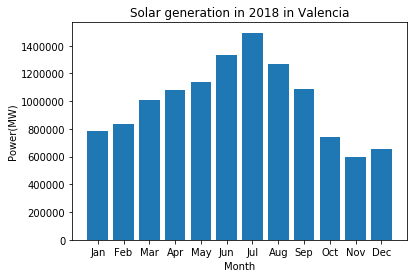

In [59]:
Month_name=['Jan' , 'Feb' , 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(Month_name, Solar_sum_vector)
plt.ylabel('Power(MW)')
plt.xlabel('Month')
plt.title('Solar generation in 2018 in '+str(City_name))
plt.show()

- Plot the amount of power(MW) Wind ONshore for city celected for 2018 per month.

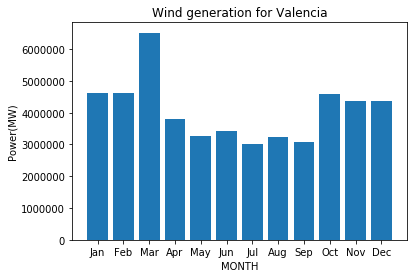

In [60]:
plt.bar(Month_name, Wind_sum_vector)
plt.xlabel('MONTH')
plt.ylabel('Power(MW)')
plt.title('Wind generation for '+str(City_name))
plt.show()  

- Plot annual Generation for 2018 for the celected city

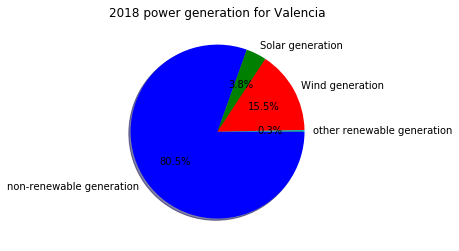

In [61]:
for i in range(len(total_load_sum_vector)):
    total_load_sum_year += total_load_sum_vector[i]
    Solar_sum_year += Solar_sum_vector[i]
    Wind_sum_year += Wind_sum_vector[i]
    other_renewable_sum_year += other_renewable_sum_vector[i]

values=[total_load_sum_year , Solar_sum_year , Wind_sum_year , other_renewable_sum_year]
colors=['b','g','r','c']
labels=['non-renewable generation','Solar generation','Wind generation','other renewable generation']
plt.pie(values, colors=colors,autopct='%1.1f%%', labels= labels,counterclock=False, shadow=True)
plt.title('2018 power generation for Valencia')
plt.show()